http://park.itc.u-tokyo.ac.jp/kato-yusuke-lab/nagai/julianote.pdf

In [2]:
using Pkg
Pkg.add("Plots")
using Plots


   Updating registry at `/opt/julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %                          ]  33.2 %>                    ]  47.9 %==========================>              ]  63.1 %Fetching: [===========================>             ]  65.1 %       ]  80.2 %Fetching: [====================================>    ]  87.9 %Fetching: [=====================================>   ]  92.2 %Fetching: [=====================================>   ]  92.3 %Fetching: [======================================>  ]  92.6 %Fetching: [======================================>  ]  92.7 %Fetching: [======================================>  ]  92.8 %Fetching: [======================================>  ]  93.0 %Fetching: [======================================>  ]  94.1 %Fetching: [=======================================> ]  97.2 %

  Resolving package versions...
  Installed FriBidi_jll ─────── v1.0.5+4
  Installed Showoff ─────────── v0.3.1
  Installed Ogg_jll ─────────── v1.3.4+1
  Installed ColorTypes ──────── v0.10.8
  Installed Colors ──────────── v0.12.3
  Installed StaticArrays ────── v0.12.4
  Installed Plots ───────────── v1.5.9
  Installed FFMPEG_jll ──────── v4.3.1+1
  Installed libass_jll ──────── v0.14.0+3
  Installed x264_jll ────────── v2020.7.14+1
  Installed LibVPX_jll ──────── v1.9.0+0
  Installed GeometryBasics ──── v0.2.15
  Installed Measures ────────── v0.3.1
  Installed Bzip2_jll ───────── v1.0.6+3
  Installed FixedPointNumbers ─ v0.8.4
  Installed PlotThemes ──────── v2.0.0
  Installed RecipesPipeline ─── v0.1.12
  Installed Opus_jll ────────── v1.3.1+2
  Installed libvorbis_jll ───── v1.3.6+5
  Installed PlotUtils ───────── v1.0.5
  Installed Adapt ───────────── v2.0.2
  Installed StructArrays ────── v0.4.4
  Installed NaNMath ─────────── v0.3.4
  Installed FFMPEG ──────────── v0.4.0
  In

#### 台形積分
${-\pi~,\pi}$
$$\frac{1}{2\pi}\sum f(k_i) \frac{2\pi}{N} = \frac{1}{N}\sum f(k_i)$$

In [ ]:
# 積分
function daikei(f, N)
    dk = 2π/(N-1)
    fsum = 0
    for i=1:N
        k = (i-1)*dk - π
        fsum += f(k)
    end
    fsum /= N
    return fsum
end

f(x) = sin(x) + x^2
N = 400
fsum = daikei(f, N)
exact = ((π)^3/3 -(-π)^3/3)/(2π)
println("daikei $fsum, exact $exact")

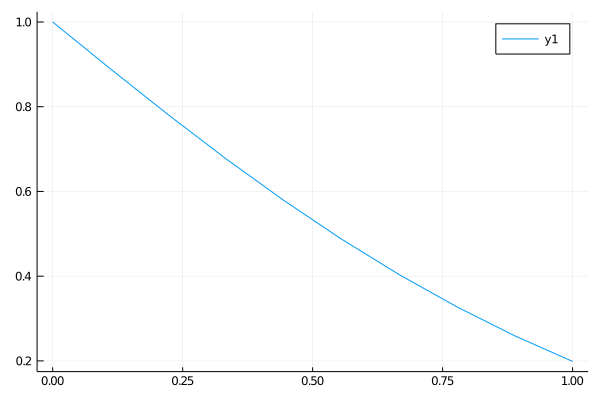

In [7]:
# plot基本
f(x) = cos(x)*exp(-x)
n = 10
xs = range(0, 1, length=n)
fs = f.(xs)
plot(xs, fs)
# for で計算
#for i=1:n
#    x = (i-1) / (n-1)
#    println(f(x))
#end

┌ Info: Saved animation to 
│   fn = /home/jovyan/julia/viz/sin_cos.gif
└ @ Plots /opt/julia/packages/Plots/shY1Z/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/julia/viz/sin_cos.gif")
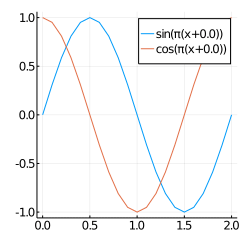

In [72]:
# アニメーション
# https://qiita.com/I_ppp/items/dca3552affa6a672e4bd#%E5%8B%95%E7%94%BB%E3%81%AE%E5%87%BA%E5%8A%96
anim = @animate for i in 0:0.1:2　　　　　　　　　　　　#@animateマクロでfor文内ループ毎をフレームとしたpngファイル生成
    x=0:0.1:2
    y1=@. sin(pi*(x+i))
    y2=@. cos(pi*(x+i))
    plot(x,y1,label="sin(π(x+$i))",size=(250,250))   #ラベルのテキストに$(変数)を使う事でラベル表示も変化
    plot!(x,y2,label="cos(π(x+$i))")                 #最後のプロットがpngとして格納される
end                                                  #endの後にever 5 等とすると5フレーム毎に残す
gif(anim, fps=120, "sin_cos.gif")

#### mantelbrot集合

$$
\left\{
\begin{eqnarray}
z_{n+1} &=& z^2_{n}+c \\
z_{0} &=& 0
\end{eqnarray}
\right.
$$

として漸化式をとく

cは複素数なので実数a,bより以下のように表せる
$$c = a + ib$$

このとき$z \neq \infty$となるcの集まりをmantelbrot集合という

zは実数(x,y)からなる$z=x+iy$として表現すると以下のように計算できる

$$
\begin{eqnarray}
z_{n+1} &=& (x_n+iy_n)^2 + c2 \\
        &=& x_n^2 + 2ix_ny_n -y^2_n + a + ib
\end{eqnarray}
$$

$z_{n+1} = x_{n+1} + iy_{n+1}$より実部と虚部を分ける

$$
\begin{eqnarray}
x_{n+1} &=& x_n^2 - y^2_n + a \\
y_{n+1} &=& 2x_ny_n + b
\end{eqnarray}
$$

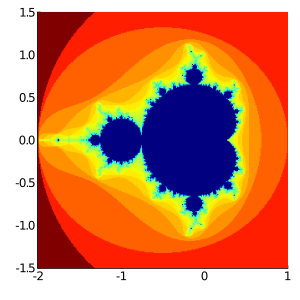

In [100]:
x = range(-2, 1; length=300)
y = range(-1.5, 1.5; length=300)
c = x' .+ y * im

function mandelbrot(c, n=2000)
    z = zero(c)
    for i = 1:n
        z = z^2 + c
        abs2(z) > 4 && return i
    end
    return n
end
r = mandelbrot.(c, 300)
heatmap(x, y, log10.(r),
    colorbar=false, size=(300, 300), color=reverse(cgrad(:jet1)))


┌ Info: Saved animation to 
│   fn = /home/jovyan/julia/viz/mandelbrot.gif
└ @ Plots /opt/julia/packages/Plots/shY1Z/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/julia/viz/mandelbrot.gif")
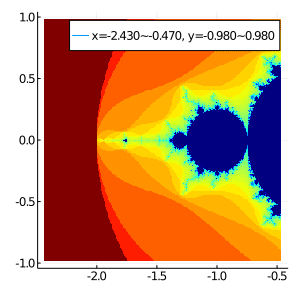

In [340]:
# 始点
xs = -1.45
ys = -0
t = range(0.01, 4, length=200)
ss = @. exp(-2*t)
anim = @animate for s in ss
    x = range(xs-s, xs+s, length=300)
    y = range(ys-s, ys+s, length=300)
    c = x' .+ y * im
    r = mandelbrot.(c, 300)
    #println(r)
    s = @sprintf "x=%.3f~%.3f, y=%.3f~%.3f" xs-s xs+s ys-s ys+s;
    plot(x, y,label=s, size=(250,250))  
    heatmap!(x, y, log.(r),
        colorbar=false, size=(300, 300), color=reverse(cgrad(:jet1)))

end
gif(anim, fps=40, "mandelbrot.gif")

#### julia集合

$$
z_{n+1}=z^2_{n}+c 
$$

の漸化式をとく。cは複素数なので実数a,bより以下のように表せる

$$c = a + ib$$

このときcを固定（a,bを定数にする)して$z_n$を変化させる

$z \neq \infty$となる$z_n$の集まりをjulia集合という

以下のように初期値をx, yを代入して求めていく

$$z_n = x_n + iy_n$$

https://nbviewer.jupyter.org/gist/genkuroki/87bfad7b74918a1f4f6b005f4a9e6676

In [270]:
function julia(c, z, n=2000)
    for i = 1:n
        z = z^2 + c
        abs2(z) > 4 && return i
    end
    return n
end

julia (generic function with 3 methods)

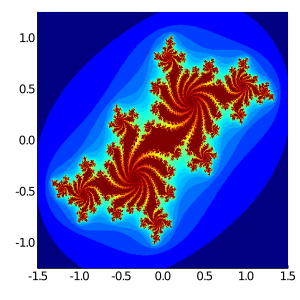

In [339]:
x = range(-1.5, 1.5; length=600)
y = range(-1.25, 1.25; length=400)
a = -0.3
b = -0.63
c = complex(a, b)

r = @.julia(c, complex(x', y), 400)
heatmap(x, y, log10.(r),
    colorbar=false, size=(300, 300), color=:jet1)


 88.459992 seconds (680.15 M allocations: 14.696 GiB, 7.59% gc time)


┌ Info: Saved animation to 
│   fn = /home/jovyan/julia/viz/julia_set.gif
└ @ Plots /opt/julia/packages/Plots/shY1Z/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/julia/viz/julia_set.gif")
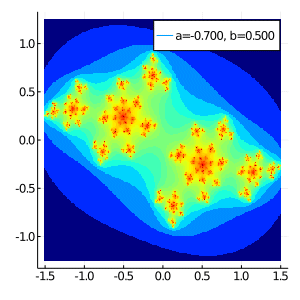

In [328]:
#t = range(0.6, 1.2; length=100)
#ss = [t; reverse(t)[2:end-1]]
x = range(-1.5, 1.5; length=300)
y = range(-1.25, 1.25; length=300)
a = -0.7
@time anim = @animate for s in 0.5:-0.0025:0.27 #ss
    #a = s
    b = s
    c = complex(a, b)
    r = @.julia(c, complex(x', y), 600)
    s = @sprintf "a=%.3f, b=%.3f" a b;
    plot(x, y,label=s,size=(250,250))
    heatmap!(x, y, log10.(r),
        colorbar=false, size=(300, 300), color=:jet1)
end

gif(anim, "julia_set.gif", fps=40)